# Deep Learning

## Shallow and Deep Networks

(1000, 2)
(1000, 2)


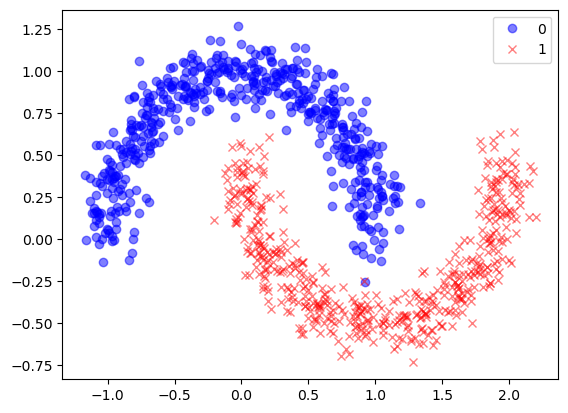

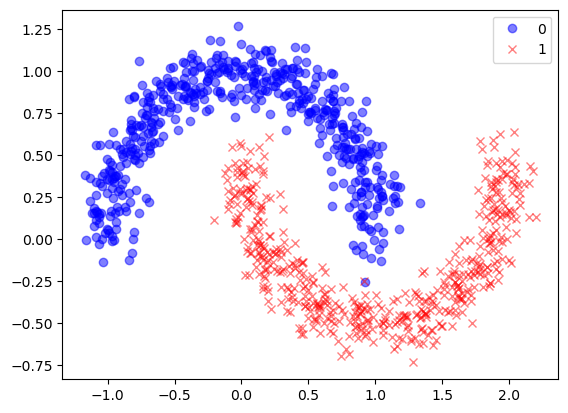

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

# create datset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# data exploration
print(X.shape)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])
plt.show()

## Shallow Model

In [ ]:
# create model
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='shallow_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
results = model.evaluate(X_test, y_test)
print("The Accuracy score on the train set is:\t{:0.3f}".format(results[1]))

In [ ]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    CS = plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.clabel(CS, inline=True, fontsize=12)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.title("Decision boundary of model (default threshold is usually 0.5)")
    
plot_decision_boundary(model, X, y)

## Deep model

In [ ]:
# create model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='deep_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# evaluate
model.evaluate(X_test, y_test)

In [ ]:
threshold = 0.5
y_train_pred = model.predict(X_train)
y_train_pred = y_train_pred > threshold

y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred > threshold

print("The Accuracy score on the train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

In [ ]:
plot_decision_boundary(model, X, y)

## Multi-class classification with the Iris dataset

In [ ]:
# read dataset
df = pd.read_csv('iris.csv')

# data exploration
sns.pairplot(df, hue="species")

In [ ]:
df.head()

In [ ]:
# feature engineering
X = df.drop('species', axis=1)
X.head()

In [ ]:
# easier alternative for transforming strings to numerical labels is to use sklearn.preprocessing.LabelEncoder()
target_names = df['species'].unique()
print(target_names)

target_dict = {n:i for i, n in enumerate(target_names)}
print(target_dict)
y = df['species'].map(target_dict) 

y.head()

In [ ]:
# easier alternative for one-hot encoding is to use pandas.get_dummies()
from tensorflow.keras.utils import to_categorical 
y_cat = to_categorical(y)
y_cat[:10]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [ ]:
# create model
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='iris_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

In [ ]:
# evaluate model
y_pred = model.predict(X_test)
print(f'\n\n{y_pred[:5]}')

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(f'\n\n{y_pred_class[:5]}')

print('\n\nclassification report:')
print(classification_report(y_test_class, y_pred_class))

print('\n\nconfusion matrix:')
confusion_matrix(y_test_class, y_pred_class)

## Questions about Iris classification

* Why do we perform one-hot encoding of the label y during the feature engineering step?
* Why do we use np.argmax() during the evaluation step?